## Titanic: Machine Learning from
https://www.kaggle.com/
### 타이타닉의 생존율을 예측
 - 문제를 정의(Defining the problem statement)
 - 데이터를 수집 (Collecting the data)
 - 데이터 탐색 (Exploratory data analysis)
 - 피처 엔지니어링 (Feature engineering)
 - 모델링 (Modelling)
 - 평가(Testing)

1. 문제 정의
- 어떤 승객이 생존할 수 있었는지
- 어떤 패턴의 데이터 승객이 생존 했는지

2. 데이터 수집
- kaggle 사이트
- titanic_train.csv
- 데이터 셋(train.csv, test.csv)

3. 데이터 읽어 오기
- train 데이터에 읽어 오기
- 기본 데이터 파악 : 어떻게 생겼는지, 구성은 어떻게 되었는지, 컬럼은 몇 개

In [3]:
import pandas as pd

train = pd.read_csv('c:/Users/USER/파이썬공부/titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.describe()
#데이터 타입이 int 혹은 float일 때만 요약 통계에 잡힌다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#전체 (891건)
#Age(177건), Cabin(687건) >>> 결측치가 많음
#Embarked(2건)

## 실습. 타이타닉 이미지를 화면에 출력
- 웹에서 타이타닉 이미 다운
- 화면에 보여주기

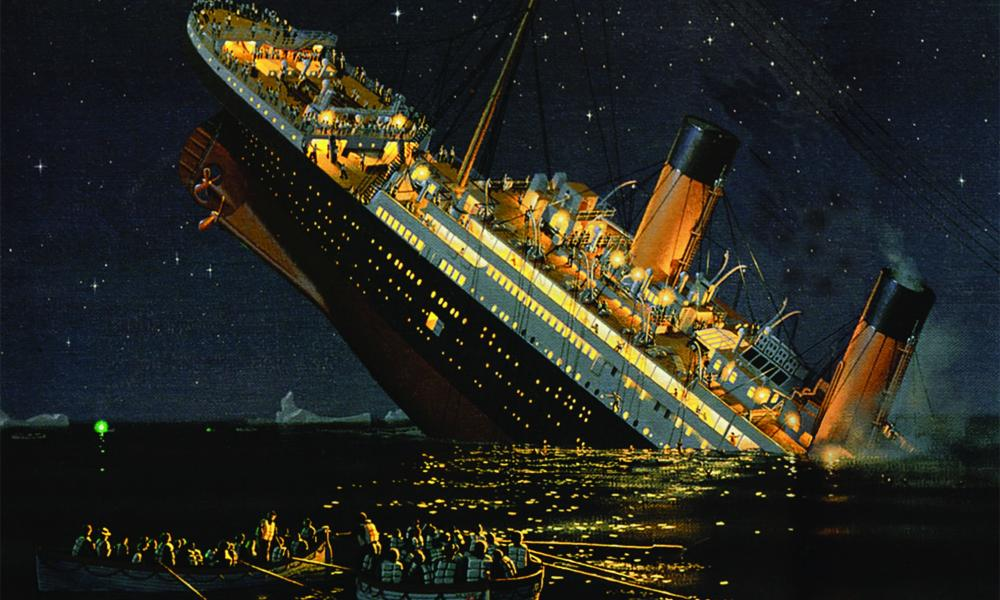

In [40]:
from IPython.display import Image
Image('c:/Users/USER/파이썬공부/titanic2.jpg', width=500)

5. 데이터 시각화 준비
- matplotlib, seaborn 사용 준비
- Categorical Features > Bar Chart
 + Pclass, Sex, SibSp, Parch, Embarked, Cabin

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

6. 성별, 생존 유무의 인원수를 막대그래프로 그림
- X축 생존유무 (Survived / Dead)
- Y축 인원수

In [14]:
#survived = 생존자의 성별 인원 데이터
#dead = 사망자의 성별 인원 데이터
#df = DataFrame([survived, dead])
#df.index = ['Survived', 'Dead']
#df.plot(kind='bar', stacked=True, figsize=(10,5))

In [26]:
Survived = train[train['Survived']==1]['Sex'].value_counts()
Dead = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([Survived, Dead], index=['Survived', 'Dead'])
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:>

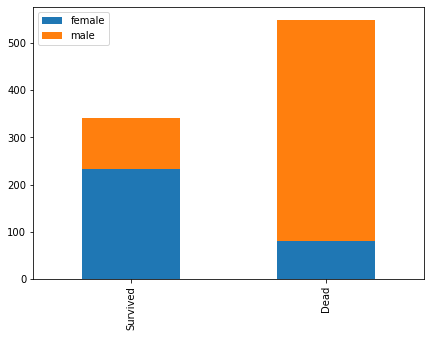

In [30]:
df.plot(kind='bar', stacked=True, figsize=(7,5))

In [41]:
#사망자 > 생존자
#생존자 성별 비교 : 여성 생존자 > 남성 생존자
#사망자 성별 비교 : 여성 사망자 < 남성 사망자
#비교를 위해서는 stacked=False의 디폴트 값이 훨씬 유용

7. Pclass별, 생존유무의 인원수를 막대그래프로 그림
- X축 생존유무
- Y축 인원수
- Pclass (1,2,3)

In [48]:
Survived = train[train['Survived']==1]['Pclass'].value_counts()
Dead = train[train['Survived']==0]['Pclass'].value_counts()
df=pd.DataFrame([Survived, Dead], index=['Survived', 'Dead'])
df

,1,2,3
Survived,136,87,119
Dead,80,97,372


<AxesSubplot:>

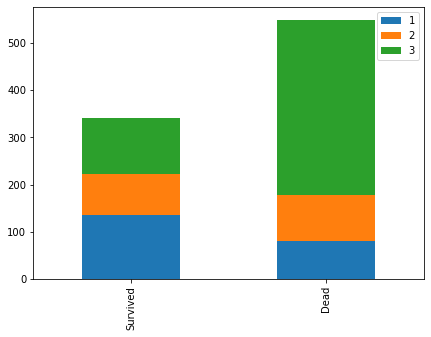

In [49]:
df.plot(kind='bar', stacked=True, figsize=(7,5))

In [50]:
#생존자 중 1등석 생존률이 높다.
#사망자 중 3등석 사망률이 높다.
#사망자 수는 전체 인원수 중 3등석의 인원수가 많아서 발생한 통계일 수도 있다.

8. ??별, 생존유무의 인원수를 막대그래프를 그리는 bar_char() 함수를 만들기
- bar_chart('Sex') #Pclass, Sex, SibSp, Parch, Embarked, Cabin

In [88]:
def bar_chart(feature):
    Survived = train[train['Survived']==1][feature].value_counts()
    Dead = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([Survived, Dead], index=['Survived', 'Dead'])
    return df.plot(kind='bar', stacked=True, figsize=(7,5))

<AxesSubplot:>

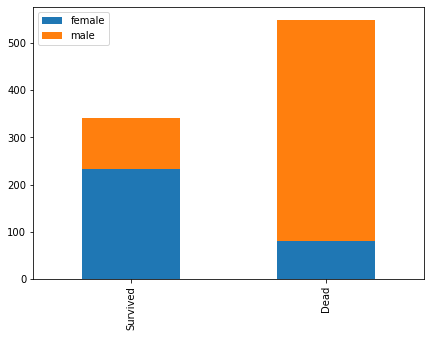

In [89]:
bar_chart('Sex')

<AxesSubplot:>

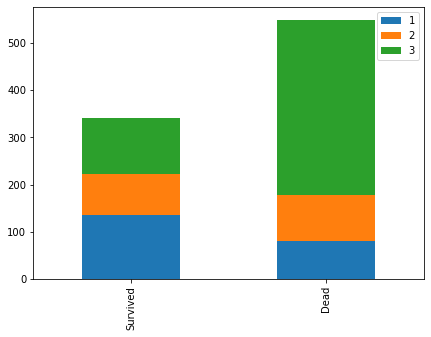

In [90]:
bar_chart('Pclass')

<AxesSubplot:>

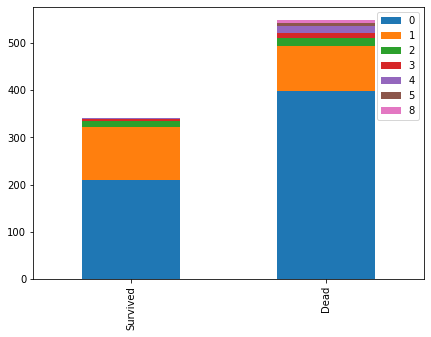

In [91]:
bar_chart('SibSp')

In [92]:
#SibSp : 동승자(형제자매,배우자)
#동승자가 없는 사람의 사망자 수가 많지만 사망자와 생존자의 그래프 비율이 유사한 것을 보면 동승자의 유무의 상관없이
#동승자가 없는 사람의 전체 비율이 높았기 때문으로 보인다.

<AxesSubplot:>

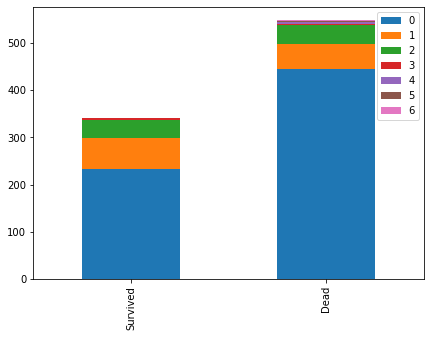

In [93]:
bar_chart('Parch')

In [ ]:
#Parch : 동승자(부모, 자식)
#동승자 데이터는 다 유사한 통계 결과를 갖는다.

<AxesSubplot:>

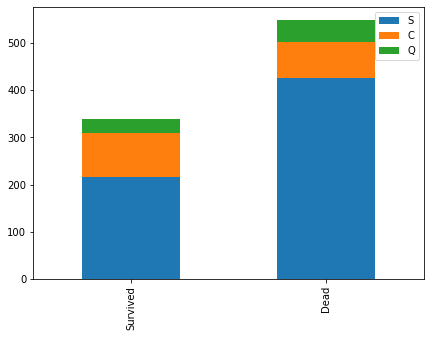

In [101]:
bar_chart('Embarked')

In [ ]:
#사망자, 생존자 데이터의 비율 구성이 유사하므로 동승자 통계 결과와 유사하다.

<AxesSubplot:>

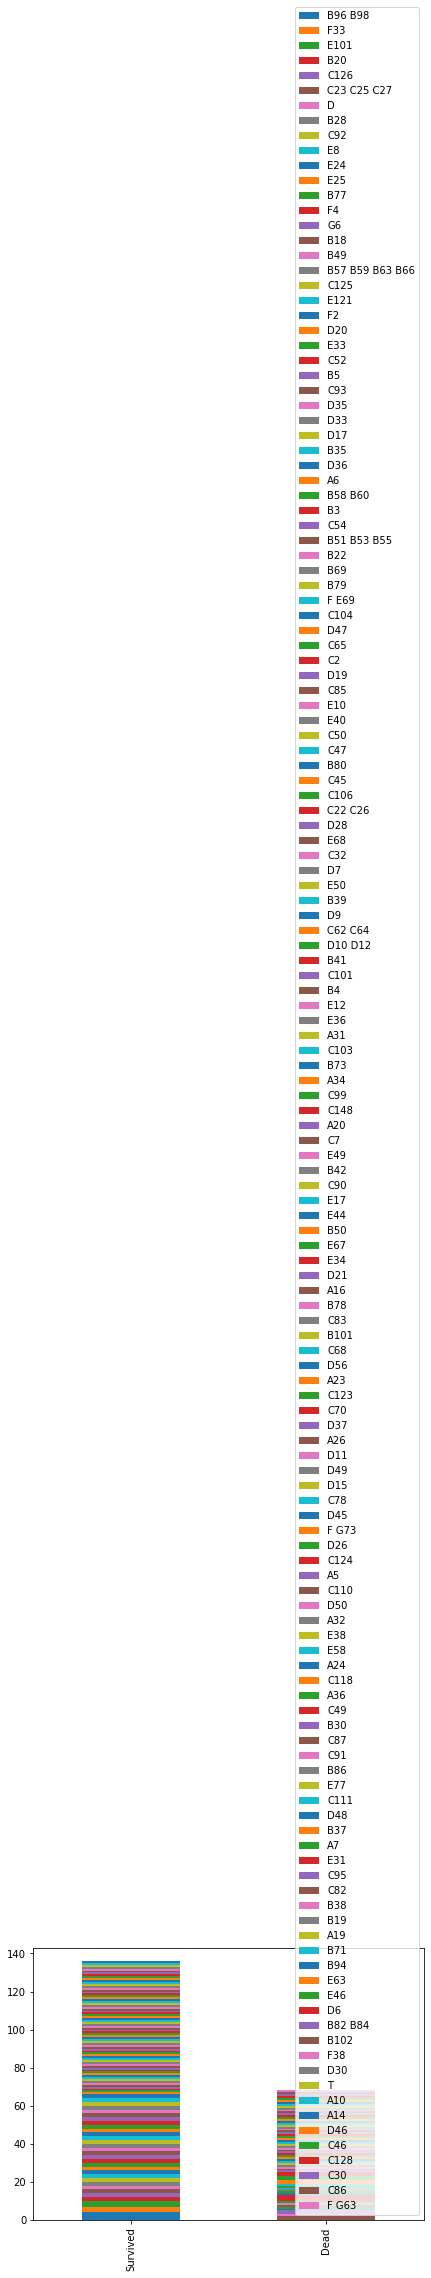

In [97]:
bar_chart('Cabin')

In [98]:
#Cabin은 좌석이 모두 다르기 때문에 통계의 의미가 없었다.

## Feature Engineering

In [100]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
